# Equation of a snake


[from reddit:](https://www.reddit.com/r/theydidthemath/comments/udblh8/request_what_is_the_equation_of_this_snake/)


A pretty straight forward question, with a not so straight forward answer...

### What is the equation of this snake?
<img src="snake.jpg" width="400">

The goal here is to estimate this equation. That is, fit a line of best fit. We can start by trying a higher-order polynomial regression. It is known that the higher the more polynomials that are included, the more the linear regression will overfit.

We start by importing the necessary frameworks...

In [347]:
import numpy as np
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf


ModuleNotFoundError: No module named 'tensorflow'

to get the necessary data points, and given that the image isn't overly large, we can manually via trial and error enter the Y coordinates...

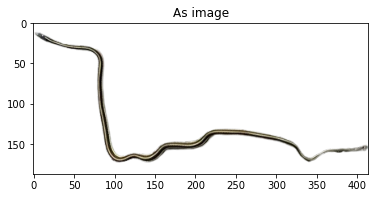

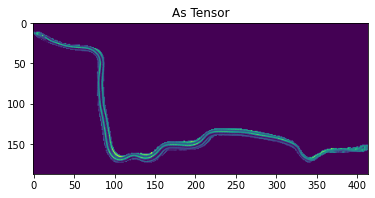

In [270]:
IMG = 'snake_cropped-removeBG.png'
img = mpimg.imread(IMG)


image_tensor = io.read_image(IMG,io.ImageReadMode.GRAY)


plt.title("As image")
plt.imshow(img);
plt.show();
plt.title("As Tensor")
plt.imshow(  image_tensor.permute(1, 2,0)  );
plt.show();







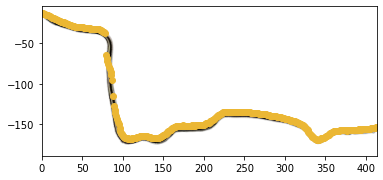

In [327]:
img_numpy = image_tensor[0].T.numpy()
x = list(range(len(img_numpy)))
y = [-np.mean([x for x in range(len(img_numpy[i])) if img_numpy[i][x]>0]) for i in range(len(img_numpy))]

fig, ax = plt.subplots()
ax.imshow(img, extent=[np.min(x), np.max(x), np.min(y)-20, np.max(y)+8])
ax.scatter(x,y, color="#ebb734")


Now we have to implement the polynomials. The issue here is that the data will always overfit more and more, so that a numerical "fit-metric" won't best reflect

In [343]:
# Add Intercept
X = np.array(x)
y = np.array(y)

NUM_POLYNOMIALS = 20

X_input = np.vstack((np.ones_like(X),X))
for p in range(1,NUM_POLYNOMIALS):
        X_input = np.vstack((X_input,X**p))



X_input = X_input.T

reg = LinearRegression().fit(X_input, y)
reg.score(X_input, y)

0.9295300724543303

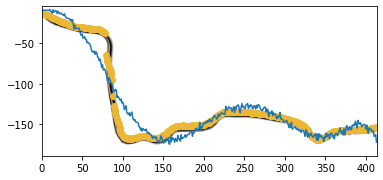

In [344]:
X_pred = reg.predict(X_input)


fig, ax = plt.subplots()
ax.imshow(img, extent=[np.min(x), np.max(x), np.min(y)-20, np.max(y)+8])
ax.scatter(X,y, color="#ebb734")
ax.plot(X_pred)

plt.show()

In [ ]:
model = tf.keras.models.Sequential([
  #tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])